# Verifica di Microrobotica: machine learning

### Nome Cognome

## Esercizio 1: concessionario di auto
Un venditore di automobili vuole classificare i suoi pontenziali clienti in due categorie: quelli che  vogliono acquistare un SUV e quelli che non lo acquisterebbero mai. Ti commissiona un algoritmo di machine learning che sia adatto allo scopo e ti fornisce il dataset storico degli acquirenti nel file `SUV_Purchase.csv` che contiene: 
* `User ID`: l'identificativo dei clienti
* `Gender`: il sesso dei clienti
* `Age`: l'età anagrafica dei clienti
* `EstimatedSalary`: il salario annuo dei clienti
* `Purchased` che vale 1 se il cliente acquista un SUV, 0 altrimenti.

Realizza un algoritmo di machine learning di tipo MultiLayer Perceptron adatto allo scopo. **Segui tutte le fasi previste per la creazione di un algoritmo di machine learning e qualora certe fasi non siano utili, spegane il motivo. Motiva anche la scelta delle feature.**

PS: non è dato sapere se il concessionario di auto voglia vendere più SUV oppure se non sopporti i SUV...

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [3]:
data = pd.read_csv("./SUV_Purchase.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [22]:
gender_le = LabelEncoder()
gender_le.fit(data["Gender"])
data["Gender"] = gender_le.transform(data["Gender"])

data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [23]:
X = data[["Age", "EstimatedSalary", "Gender"]].values
y = data["Purchased"].values

In [24]:
x_scaler = StandardScaler()
X_sc = x_scaler.fit_transform(X)

In [27]:
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=300, random_state=42)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

In [29]:
model.fit(X_train, y_train)

c:\Users\Utente\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=300, random_state=42)

In [30]:
model.score(X_test, y_test)

0.925

## Esercizio 2: riconoscitore di banconote false

Il dataset `banknotes.csv` contiene le misure geometriche di precisione di 200 banconote (` Lengt`,`Right`,`Bottom`,`Top`,`Diagonal`). Inoltre la colonna `conterfeit` vale 1 se la banconota è contraffatta. Si vuole implementare un algoritmo in grado di eseguire su di una macchinetta portatile con bassa potenza di calcolo ma che abbia il 100% di accuratezza. Realizza un classificatore random forest adatto allo scopo e:
* calcola la profondità minima degli alberi che permetta un'accuratezza del 100%
* calcola l'importanza delle diverse feature
* riaddrestra il modello facendo uso delle feature che rilevi come quelle più importanti.

**Segui tutte le fasi previste per la creazione di un algoritmo di machine learning e qualora certe fasi non siano utili, spegane il motivo.**

In [5]:
data2 = pd.read_csv("./banknotes.csv")
data2

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...,...
195,1,215.0,130.4,130.3,9.9,12.1,139.6
196,1,215.1,130.3,129.9,10.3,11.5,139.7
197,1,214.8,130.3,130.4,10.6,11.1,140.0
198,1,214.7,130.7,130.8,11.2,11.2,139.4


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [7]:
features = ["Length", "Left", "Right", "Bottom", "Top", "Diagonal"]
target = ["conterfeit"]

In [8]:
X = data2[features]
y = data2[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

In [10]:
model = RandomForestClassifier(max_depth = 1, random_state = 123)
model.fit(X_train, y_train)

c:\Users\Utente\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=1, random_state=123)

In [11]:
y_pred = model.predict(X_test)
accuratezza = accuracy_score(y_test, y_pred)
accuratezza

1.0

In [12]:
model.score(X_test, y_test)

1.0

In [13]:
minProf = None
for i in range(1,15):
    model = RandomForestClassifier(max_depth = i)
    model.fit(X_train, y_train.values.ravel())
    accuratezza = model.score(X_test, y_test)
    if(accuratezza == 1.0):
        minProf = i
        break
minProf

1

In [14]:
model.feature_importances_

array([0.  , 0.09, 0.19, 0.21, 0.17, 0.34])

In [15]:
for features, importance in zip(features, model.feature_importances_):
    print(f"{features}: {importance}")

Length: 0.0
Left: 0.09
Right: 0.19
Bottom: 0.21
Top: 0.17
Diagonal: 0.34


In [16]:
feature = ["Diagonal"]
target = ["conterfeit"]

In [17]:
X = data2[feature]
y = data2[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

In [19]:
model = RandomForestClassifier(max_depth = 1, random_state = 123)
model.fit(X_train, y_train)

c:\Users\Utente\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=1, random_state=123)

In [20]:
model.score(X_test, y_test)

1.0

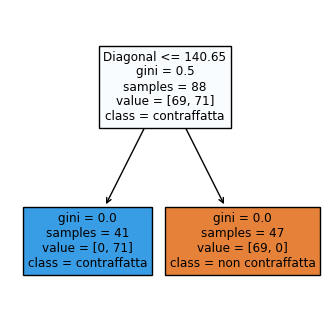

In [21]:
albero = model.estimators_[0]
fig, ax = plt.subplots(figsize=(4,4))
plot_tree(albero, feature_names = feature, class_names = ["non contraffatta", "contraffatta"], filled = True, label="all")
plt.show()